In [2]:
import numpy as np
import os
import wfdb
from collections import Counter
import pickle
import random
import sys
from tqdm import tqdm
from scipy.interpolate import interp1d

label_group_map = {
    'N': 'N', 'L': 'N', 'R': 'N', 'V': 'V', '/': 'Q', 'A': 'S', 'F': 'F', 
    'f': 'Q', 'j': 'N', 'a': 'S', 'E': 'V', 'J': 'S', 'e': 'N', 'Q': 'Q', 
    'S': 'S'
}

if __name__ == "__main__":

    path = 'mit-bih-arrhythmia-database-1.0.0'
    save_path = 'data/'
    primary_lead = 'MLII'
    secondary_leads = ['V1', 'V2', 'V4', 'V5']
    num_samples = 200  # Number of samples to extract

    all_data = []
    all_data_single_lead = []
    all_group = []

    with open(os.path.join(path, 'RECORDS'), 'r') as fin:
        all_record_name = fin.read().strip().split('\n')

    for record_name in all_record_name:
        try:
            tmp_ann_res = wfdb.rdann(path + '/' + record_name, 'atr').__dict__
            tmp_data_res = wfdb.rdsamp(path + '/' + record_name)
        except:
            print('read data failed')
            continue
        fs = tmp_data_res[1]['fs']
        half_samples = num_samples // 2

        lead_in_data = tmp_data_res[1]['sig_name']
        if primary_lead in lead_in_data:
            primary_channel = lead_in_data.index(primary_lead)
            primary_data = tmp_data_res[0][:, primary_channel]

            for secondary_lead in secondary_leads:
                if secondary_lead in lead_in_data:
                    secondary_channel = lead_in_data.index(secondary_lead)
                    secondary_data = tmp_data_res[0][:, secondary_channel]

                    idx_list = list(tmp_ann_res['sample'])
                    label_list = tmp_ann_res['symbol']
                    for i in range(len(label_list)):
                        s = label_list[i]
                        if s in label_group_map.keys():
                            idx_start = idx_list[i] - half_samples
                            idx_end = idx_list[i] + half_samples
                            if idx_start < 0 or idx_end > len(primary_data):
                                continue
                            else:
                                primary_segment = primary_data[idx_start:idx_end]
                                secondary_segment = secondary_data[idx_start:idx_end]

                                combined_data = np.vstack((primary_segment, secondary_segment))
                                combined_data = np.swapaxes(combined_data, 0, 1)
                                all_data.append(combined_data)

                                single_combined = np.vstack(primary_segment)
                                all_data_single_lead.append(single_combined)
                                all_group.append(label_group_map[s])
                    print('record_name:{}, leads:{}/{}'.format(record_name, primary_lead, secondary_lead))
        else:
            print('lead in data: [{}]. primary lead {} not found in {}'.format(lead_in_data, primary_lead, record_name))
            continue

    all_data = np.array(all_data)
    all_group = np.array(all_group)
    all_data_single_lead = np.array(all_data_single_lead)
    print(all_data.shape)
    print(all_data_single_lead.shape)
    print(Counter(all_group))
    np.save(os.path.join(save_path, 'mitdb_data.npy'), all_data)
    np.save(os.path.join(save_path, 'mitdb_data_single_lead.npy'), all_data_single_lead)
    np.save(os.path.join(save_path, 'mitdb_group.npy'), all_group)



record_name:100, leads:MLII/V5
record_name:101, leads:MLII/V1
lead in data: [['V5', 'V2']]. primary lead MLII not found in 102
record_name:103, leads:MLII/V2
lead in data: [['V5', 'V2']]. primary lead MLII not found in 104
record_name:105, leads:MLII/V1
record_name:106, leads:MLII/V1
record_name:107, leads:MLII/V1
record_name:108, leads:MLII/V1
record_name:109, leads:MLII/V1
record_name:111, leads:MLII/V1
record_name:112, leads:MLII/V1
record_name:113, leads:MLII/V1
record_name:114, leads:MLII/V5
record_name:115, leads:MLII/V1
record_name:116, leads:MLII/V1
record_name:117, leads:MLII/V2
record_name:118, leads:MLII/V1
record_name:119, leads:MLII/V1
record_name:121, leads:MLII/V1
record_name:122, leads:MLII/V1
record_name:123, leads:MLII/V5
record_name:124, leads:MLII/V4
record_name:200, leads:MLII/V1
record_name:201, leads:MLII/V1
record_name:202, leads:MLII/V1
record_name:203, leads:MLII/V1
record_name:205, leads:MLII/V1
record_name:207, leads:MLII/V1
record_name:208, leads:MLII/V1
re

Physical devices found: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Memory growth of device 0: True
Epoch 1/100
739/739 [==============================] - 41s 42ms/step - loss: 0.0346 - accuracy: 0.9189 - f1_score: 0.5633 - val_loss: 0.0130 - val_accuracy: 0.9649 - val_f1_score: 0.8111 - lr: 1.0000e-04
Epoch 2/100
739/739 [==============================] - 29s 40ms/step - loss: 0.0096 - accuracy: 0.9730 - f1_score: 0.8503 - val_loss: 0.0082 - val_accuracy: 0.9791 - val_f1_score: 0.8835 - lr: 1.0000e-04
Epoch 3/100
739/739 [==============================] - 29s 40ms/step - loss: 0.0070 - accuracy: 0.9789 - f1_score: 0.8869 - val_loss: 0.0058 - val_accuracy: 0.9830 - val_f1_score: 0.9025 - lr: 1.0000e-04
Epoch 4/100
739/739 [==============================] - 29s 40ms/step - loss: 0.0059 - accuracy: 0.9823 - f1_score: 0.9053 - val_loss: 0.0048 - val_accuracy: 0.9851 - val_f1_score: 0.9243 - lr: 1.0000e-04

2024-05-17 01:57:17,679 - Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 2)]         0         
                                                                 
 vgg_net (VGGNet)            (None, None, 128)         443520    
                                                                 
 bi_gru (BiGRU)              (None, None, 256)         198144    
                                                                 
 stacked_transformer_encode  (None, None, 256)         1583104   
 r (StackedTransformerEncod                                      
 er)                                                             
                                                                 
 global_average_pooling1d (  (None, 256)               0         
 GlobalAveragePooling1D)                                         
                                   

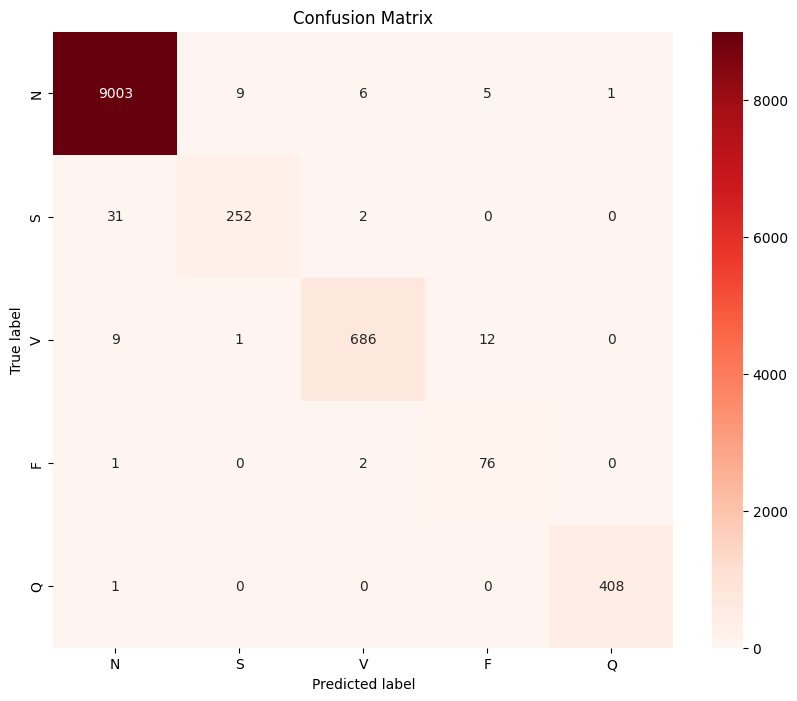

2024-05-17 02:09:51,846 - Class 'N' Accuracy: 0.9977
Class 'S' Accuracy: 0.8842
Class 'V' Accuracy: 0.9689
Class 'F' Accuracy: 0.9620
Class 'Q' Accuracy: 0.9976


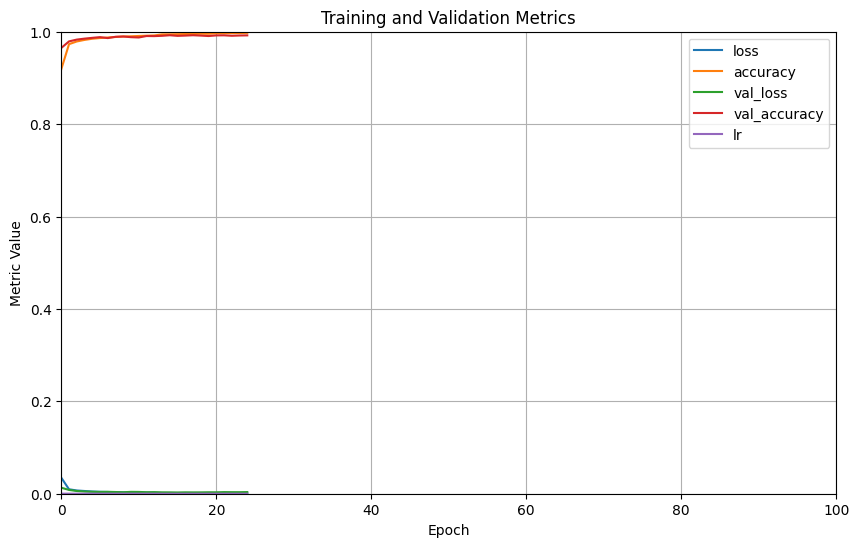

2024-05-17 02:09:52,177 - Skipping AUC-PR calculation because validation_y or y_pred is not 2D
2024-05-17 02:09:52,177 - Hamming Loss: 0.0076
2024-05-17 02:09:52,178 - Subset Accuracy: 0.9924
2024-05-17 02:09:52,178 - Micro F1: 0.9924
2024-05-17 02:09:52,178 - Macro F1: 0.9553
2024-05-17 02:09:52,178 - Weighted F1: 0.9924
2024-05-17 02:09:52,179 - Auc Pr: -1.0000
2024-05-17 02:09:52,179 - Eval Loss: 0.0030
2024-05-17 02:09:52,179 - Eval Accuracy: 0.9924
2024-05-17 02:09:52,180 - Metrics (Mean ± Std Dev):
2024-05-17 02:09:52,180 - hamming_loss: 0.0076 ± 0.0000
2024-05-17 02:09:52,180 - subset_accuracy: 0.9924 ± 0.0000
2024-05-17 02:09:52,181 - micro_f1: 0.9924 ± 0.0000
2024-05-17 02:09:52,181 - macro_f1: 0.9553 ± 0.0000
2024-05-17 02:09:52,181 - weighted_f1: 0.9924 ± 0.0000
2024-05-17 02:09:52,181 - auc_pr: -1.0000 ± 0.0000
2024-05-17 02:09:52,182 - eval_loss: 0.0030 ± 0.0000
2024-05-17 02:09:52,182 - eval_accuracy: 0.9924 ± 0.0000
2024-05-17 02:09:53,006 - Model: "model"
______________

Epoch 1/100
739/739 [==============================] - 40s 40ms/step - loss: 0.0483 - accuracy: 0.8825 - f1_score: 0.3822 - val_loss: 0.0191 - val_accuracy: 0.9507 - val_f1_score: 0.6615 - lr: 1.0000e-04
Epoch 2/100
739/739 [==============================] - 29s 39ms/step - loss: 0.0132 - accuracy: 0.9643 - f1_score: 0.8168 - val_loss: 0.0115 - val_accuracy: 0.9653 - val_f1_score: 0.8074 - lr: 1.0000e-04
Epoch 3/100
739/739 [==============================] - 29s 39ms/step - loss: 0.0090 - accuracy: 0.9740 - f1_score: 0.8665 - val_loss: 0.0080 - val_accuracy: 0.9757 - val_f1_score: 0.8649 - lr: 1.0000e-04
Epoch 4/100
739/739 [==============================] - 29s 39ms/step - loss: 0.0070 - accuracy: 0.9792 - f1_score: 0.8919 - val_loss: 0.0061 - val_accuracy: 0.9812 - val_f1_score: 0.9098 - lr: 1.0000e-04
Epoch 5/100
739/739 [==============================] - 29s 39ms/step - loss: 0.0056 - accuracy: 0.9831 - f1_

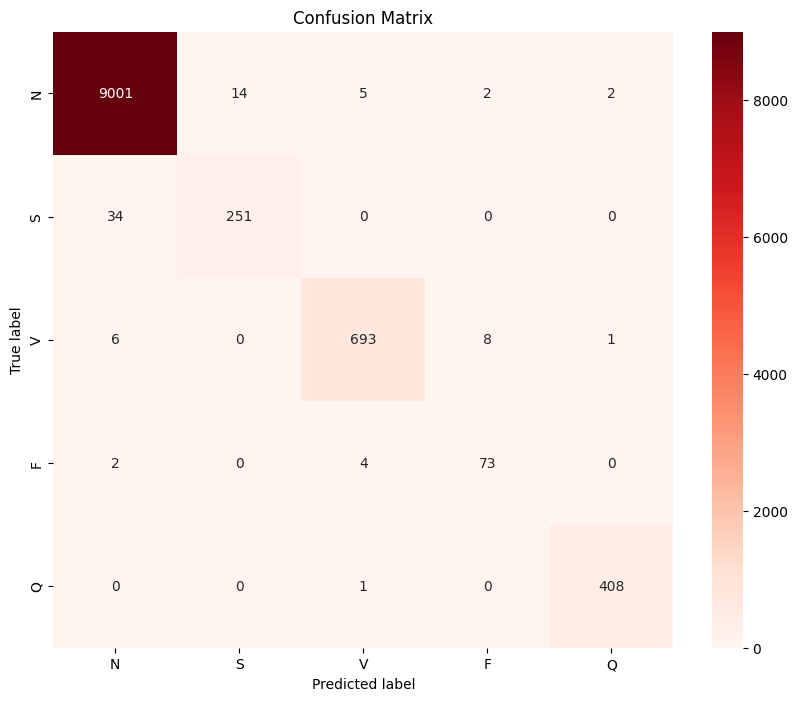

2024-05-17 02:27:05,524 - Class 'N' Accuracy: 0.9975
Class 'S' Accuracy: 0.8807
Class 'V' Accuracy: 0.9788
Class 'F' Accuracy: 0.9241
Class 'Q' Accuracy: 0.9976


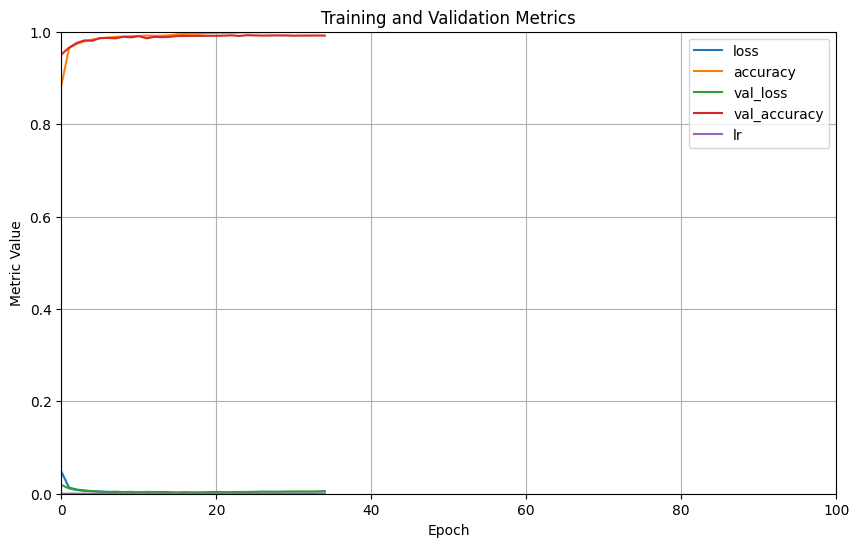

2024-05-17 02:27:05,775 - Skipping AUC-PR calculation because validation_y or y_pred is not 2D
2024-05-17 02:27:05,776 - Hamming Loss: 0.0075
2024-05-17 02:27:05,776 - Subset Accuracy: 0.9925
2024-05-17 02:27:05,777 - Micro F1: 0.9925
2024-05-17 02:27:05,777 - Macro F1: 0.9576
2024-05-17 02:27:05,777 - Weighted F1: 0.9924
2024-05-17 02:27:05,778 - Auc Pr: -1.0000
2024-05-17 02:27:05,778 - Eval Loss: 0.0038
2024-05-17 02:27:05,779 - Eval Accuracy: 0.9925
2024-05-17 02:27:05,779 - Metrics (Mean ± Std Dev):
2024-05-17 02:27:05,779 - hamming_loss: 0.0075 ± 0.0000
2024-05-17 02:27:05,780 - subset_accuracy: 0.9925 ± 0.0000
2024-05-17 02:27:05,780 - micro_f1: 0.9925 ± 0.0000
2024-05-17 02:27:05,780 - macro_f1: 0.9576 ± 0.0000
2024-05-17 02:27:05,780 - weighted_f1: 0.9924 ± 0.0000
2024-05-17 02:27:05,781 - auc_pr: -1.0000 ± 0.0000
2024-05-17 02:27:05,781 - eval_loss: 0.0038 ± 0.0000
2024-05-17 02:27:05,781 - eval_accuracy: 0.9925 ± 0.0000


In [4]:
import tensorflow.keras as keras
from tensorflow.keras import utils
import os
import tensorflow as tf
import datetime
import numpy as np
from src import train_and_evaluate
from importlib import reload
reload(train_and_evaluate)
from src import crtnet_models
reload(crtnet_models)

def label2index(i):
    m = {'N':0, 'S':1, 'V':2, 'F':3, 'Q':4}
    return m[i]

def load_and_preprocess_data(path, num_classes):
    data = np.load(os.path.join(path, 'mitdb_data.npy'))
    label_str = np.load(os.path.join(path, 'mitdb_group.npy'))
    label = np.array([label2index(i) for i in label_str])
    one_hot = utils.to_categorical(label, num_classes=num_classes)
    return data, one_hot

path = 'data/'
num_classes = 5
class_names = ['N', 'S', 'V', 'F', 'Q'] 

samples, one_hot_encoding_labels = load_and_preprocess_data(path, num_classes)

stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.00001)

model_methods = [
    crtnet_models.create_crtnet_alternate_vgg1,
    crtnet_models.create_crtnet_original_vgg1
]

for create_crtnet_method in model_methods:
    train_and_evaluate.train_and_evaluate_model(
        create_crtnet_method,
        samples=samples,
        one_hot_encoding_labels=one_hot_encoding_labels,
        callbacks=[reduce_lr, stopping],
        is_multilabel=False,
        epochs=100,
        folds=None,
        batch_size=128,
        classes=class_names,
        initial_learning_rate=0.0001, 
        number_of_leads=samples.shape[2]
    )


